In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *

from IPython.display import display,Markdown,clear_output

from importlib import reload
plt=reload(plt)

In [3]:
column_names = [
'duration',
'protocol_type',  
'service', 
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'packet_class',
'attack_class'
]
len(column_names)

43

In [4]:
df = pd.read_csv(r'../data/train_data.csv',header=None)
df.columns=column_names
pd.set_option('display.max_columns',43)

In [5]:
# CHANGING OBJECT TYPE TO CATEGORY
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['land'] = df['land'].astype('category')
df['logged_in'] = df['logged_in'].astype('category')
df['is_guest_login'] = df['root_shell'].astype('category')
df['is_host_login'] = df['is_host_login'].astype('category')
df['packet_class'] = df['packet_class'].astype('category')

<br/>
<br/>

### ADDING CLASSES FOR ATTACKS

In [6]:
def give_attack_category(packet_class):

    dos_attack = ['smurf','neptune','back','pod','teardrop','land']
    u2r_attack = ['buffer_overflow','load_module','perl','rootkit']
    r2l_attack = ['ftp_write','guess_passwd','imap','multihop','phf','spy','warez_client','warez_master']
    probe = ['ipsweep','nmap','portsweep','satan']

    if(packet_class in dos_attack) : return 'dos'
    if(packet_class in u2r_attack) : return 'u2r'
    if(packet_class in r2l_attack) : return 'r2l'
    if(packet_class in probe) : return 'probe'
    else : return 'normal'


In [7]:
df['attack_category'] = df['packet_class'].apply(give_attack_category)

In [8]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,...,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,packet_class,attack_class,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [9]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

In [11]:
attacks = df['attack_category'].value_counts().index
attacks

Index(['normal', 'dos', 'probe', 'r2l', 'u2r'], dtype='object')

<br/>
<br/>

# EDA

In [12]:
def category_freq(col:str , df:pd.DataFrame , attack:str)->None : 
    if(df[col].value_counts().shape[0]>6) : max = 6
    else : max = df[col].value_counts().shape[0]
    category_with_frequencies = df[df['attack_category']==attack][col].value_counts()[:max]
    print(category_with_frequencies)
    return


def plot_Barplot(col:str , df:pd.DataFrame , attack:str)->None:
    if(df[col].value_counts().shape[0]>6) : max = 6
    else : max = df[col].value_counts().shape[0]
    unique_categories = df[df["attack_category"]==attack][col].value_counts().index[:max]
    category_freq = df[df["attack_category"]==attack][col].value_counts().values[:max]
    
    plt.bar( x=unique_categories , height=category_freq )
    plt.title(attack+' vs '+col)
    plt.show();
    
    print()    
    return


def get_value_counts_eda(col:str , df:pd.DataFrame):
    
    if(df[col].value_counts().shape[0]>6) : max = 6
    else : max = df[col].value_counts().shape[0]
    print("Total Categories : ",df[col].value_counts().shape[0])
    category_dict = {}
    category_dict['Category'] = df[col].value_counts().index[:max]
    category_dict['Percentage'] = (df[col].value_counts().values[:max]*100)/df.shape[0]
    temp_df = pd.DataFrame(data=category_dict)
    display( Markdown( temp_df.to_markdown() ) )
    print()
    print()
    return

In [13]:
def get_describe_eda(col:str , df:pd.DataFrame , attack:str ) -> None :
    temp_df = df[df['attack_category']==attack][col].describe()
    display( Markdown(temp_df.to_markdown()) )
    return

def plot_Scatterplot(col:str , df:pd.DataFrame , attack:str)->None :
    sns.scatterplot(data=df[df['attack_category']==attack][col])
    plt.title(attack +' vs ' + col)
    plt.show();


def plot_KDEplot(col:str , df:pd.DataFrame ,  attack:str)->None :
    sns.kdeplot(data=df[df['attack_category']==attack][col],warn_singular=False)
    plt.title(attack+' vs '+col)
    plt.show();

In [14]:
def eda( col:str , df:pd.DataFrame , attacks_list:List[str] )->None:
    
    if(df[col].dtype=='category') : get_value_counts_eda(col,df)
    for attack in attacks_list:
        print('___________________________________________________________________________________')
        print()
        if(df[col].dtype=='category'):
            category_freq(col,df,attack)
            plot_Barplot(col,df,attack)
        else:
            get_describe_eda(col,df,attack)
            plot_Scatterplot(col,df,attack)
            plot_KDEplot(col,df,attack)
    print()
    print()
    print()
    print("===================================================================================")
    print("===================================================================================")
     

<br/>
<br/>

# PLOTTING

In [15]:
df.drop(['attack_class','packet_class'],axis=1,inplace=True)

In [16]:
len(df.columns)

41

## hot<br/>

___________________________________________________________________________________



|       |          hot |
|:------|-------------:|
| count | 68262        |
| mean  |     0.347807 |
| std   |     2.90266  |
| min   |     0        |
| 25%   |     0        |
| 50%   |     0        |
| 75%   |     0        |
| max   |    77        |

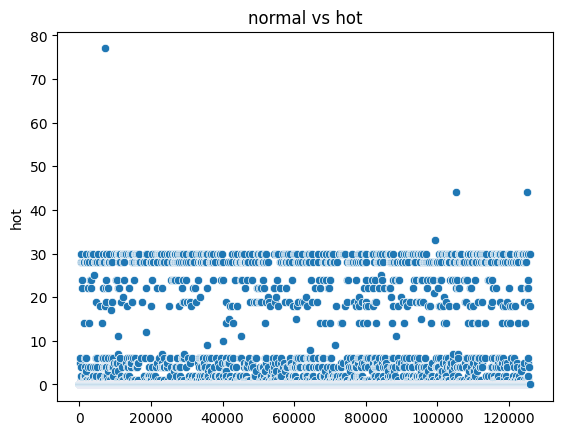

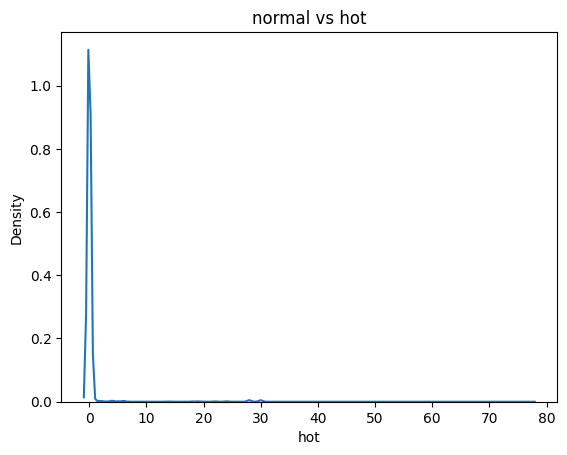

___________________________________________________________________________________



|       |           hot |
|:------|--------------:|
| count | 45927         |
| mean  |     0.0398894 |
| std   |     0.277356  |
| min   |     0         |
| 25%   |     0         |
| 50%   |     0         |
| 75%   |     0         |
| max   |     3         |

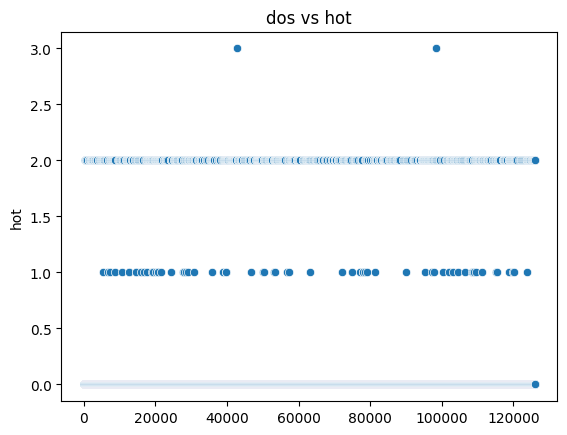

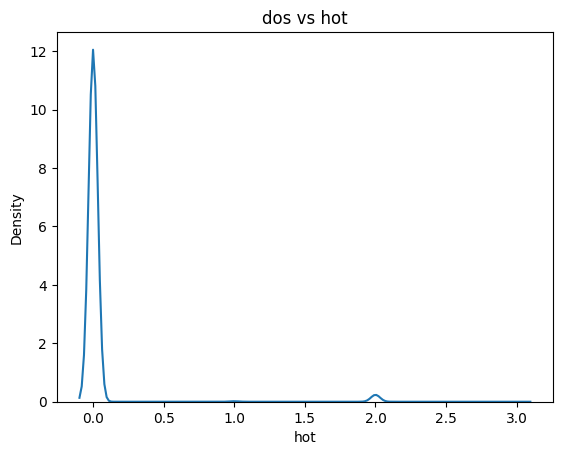

___________________________________________________________________________________



|       |            hot |
|:------|---------------:|
| count | 11656          |
| mean  |     0.00163006 |
| std   |     0.0462855  |
| min   |     0          |
| 25%   |     0          |
| 50%   |     0          |
| 75%   |     0          |
| max   |     3          |

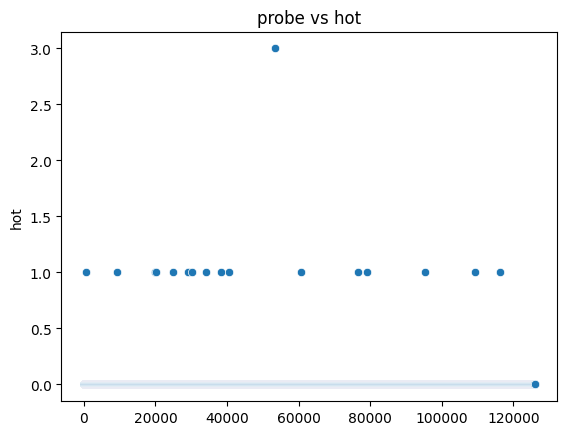

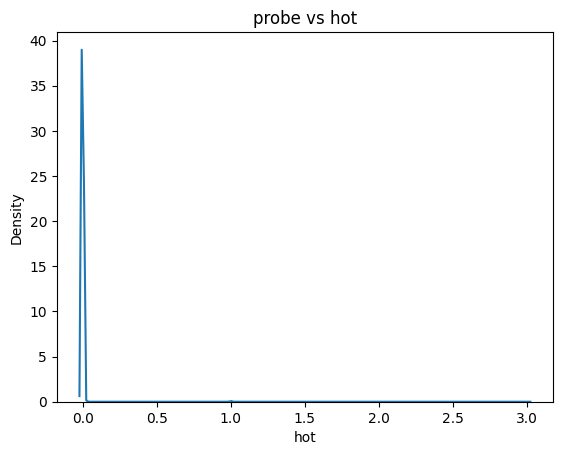

___________________________________________________________________________________



|       |      hot |
|:------|---------:|
| count | 85       |
| mean  |  1.09412 |
| std   |  1.66636 |
| min   |  0       |
| 25%   |  1       |
| 50%   |  1       |
| 75%   |  1       |
| max   | 15       |

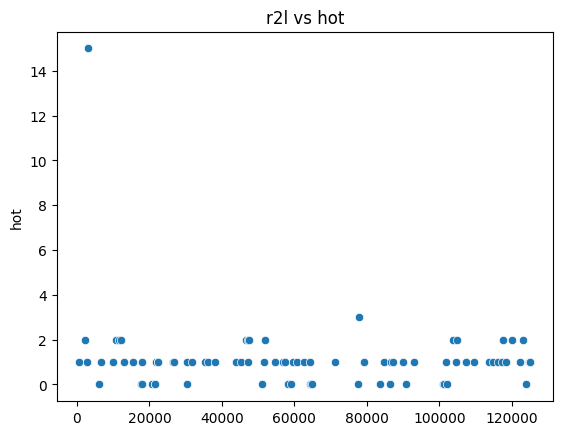

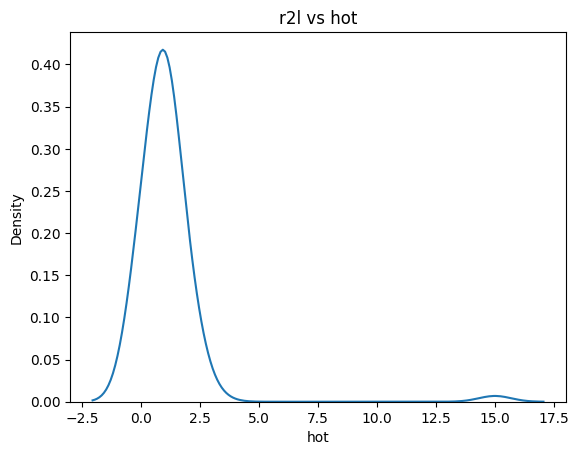

___________________________________________________________________________________



|       |      hot |
|:------|---------:|
| count | 43       |
| mean  |  1.48837 |
| std   |  1.56406 |
| min   |  0       |
| 25%   |  0       |
| 50%   |  1       |
| 75%   |  3       |
| max   |  5       |

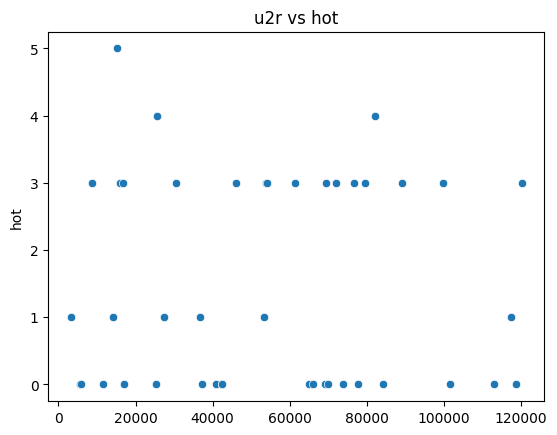

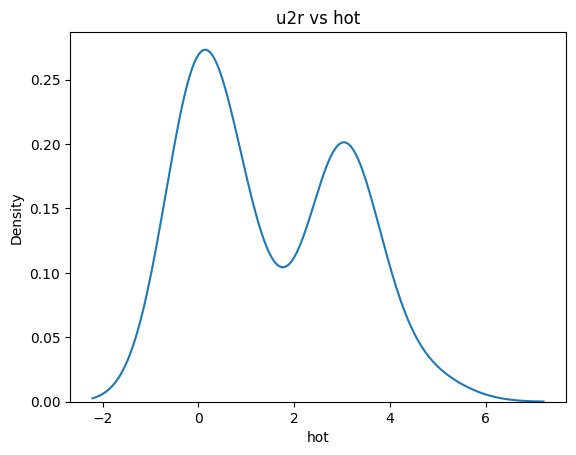

In [25]:
for i in df.columns[:10]:
    display(Markdown('## {}<br/>'.format(i)))
    eda(i,df,attacks)
    print()
    print()
    input()
    clear_output(wait=True)

## is_host_login<br/>

Total Categories :  2


|    |   Category |   Percentage |
|---:|-----------:|-------------:|
|  0 |          0 | 99.9992      |
|  1 |          1 |  0.000793821 |



___________________________________________________________________________________

0    68261
1        1
Name: is_host_login, dtype: int64


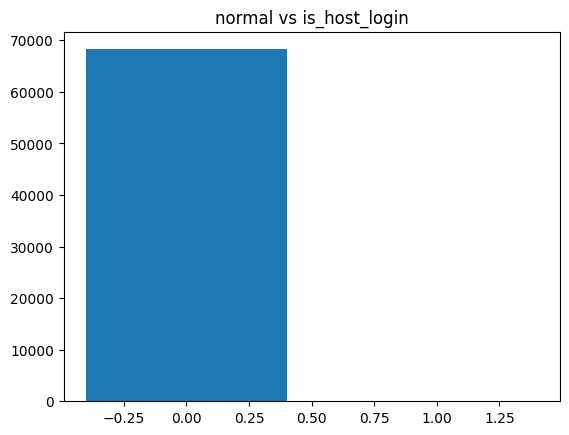


___________________________________________________________________________________

0    45927
1        0
Name: is_host_login, dtype: int64


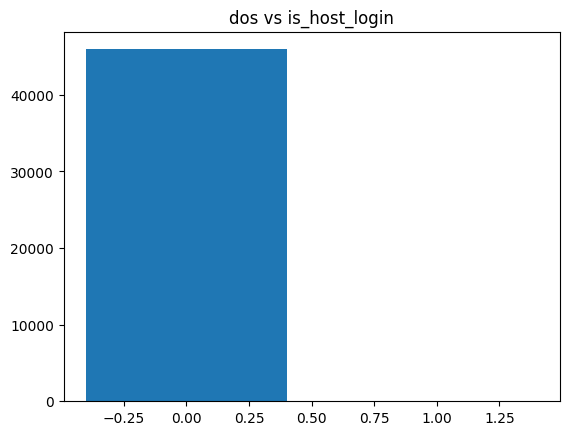


___________________________________________________________________________________

0    11656
1        0
Name: is_host_login, dtype: int64


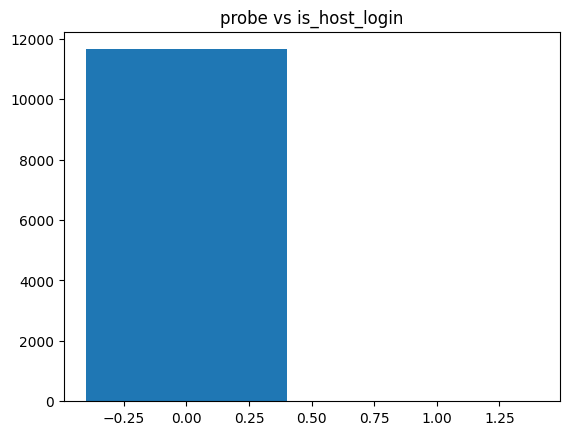


___________________________________________________________________________________

0    85
1     0
Name: is_host_login, dtype: int64


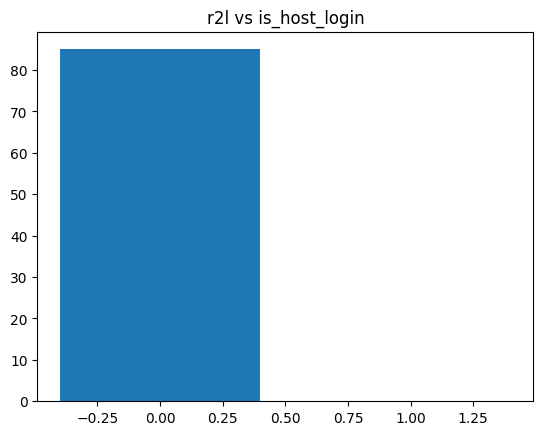


___________________________________________________________________________________

0    43
1     0
Name: is_host_login, dtype: int64


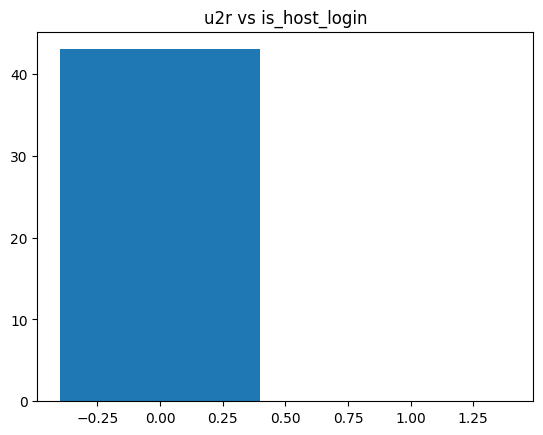

In [27]:
for i in df.columns[10:20]:
    display(Markdown('## {}<br/>'.format(i)))
    eda(i,df,attacks)
    print()
    print()
    input()
    clear_output(wait=True)

## srv_diff_host_rate<br/>

___________________________________________________________________________________



|       |   srv_diff_host_rate |
|:------|---------------------:|
| count |         68262        |
| mean  |             0.124732 |
| std   |             0.270387 |
| min   |             0        |
| 25%   |             0        |
| 50%   |             0        |
| 75%   |             0.1      |
| max   |             1        |

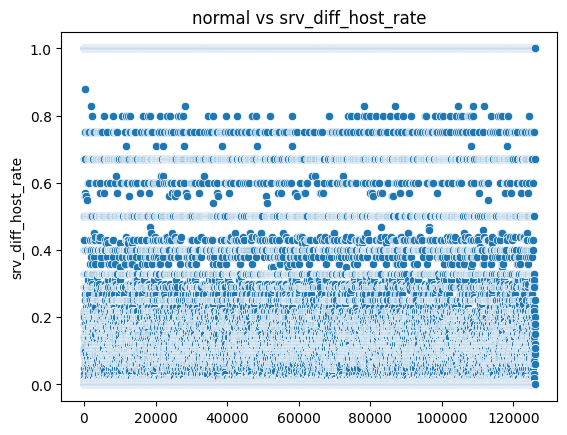

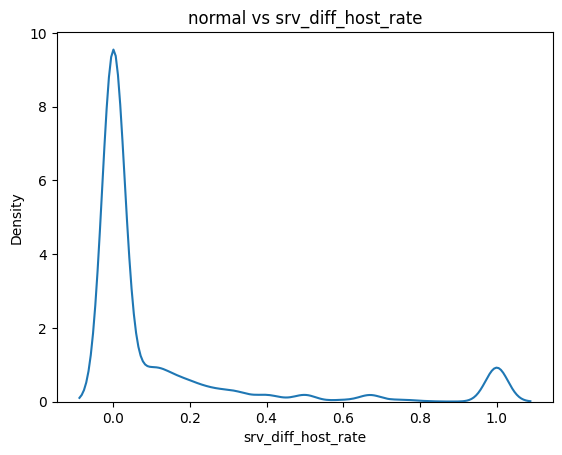

___________________________________________________________________________________



|       |   srv_diff_host_rate |
|:------|---------------------:|
| count |       45927          |
| mean  |           0.00531735 |
| std   |           0.0563902  |
| min   |           0          |
| 25%   |           0          |
| 50%   |           0          |
| 75%   |           0          |
| max   |           1          |

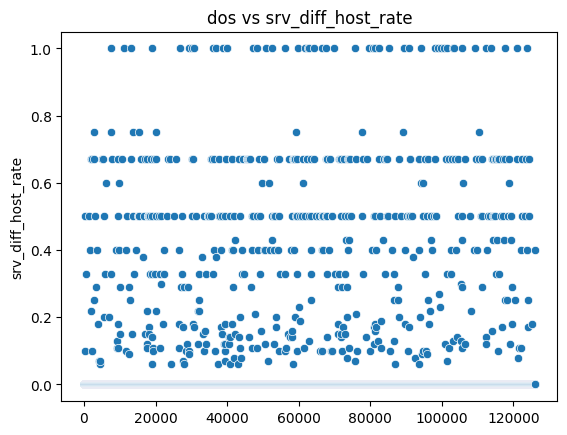

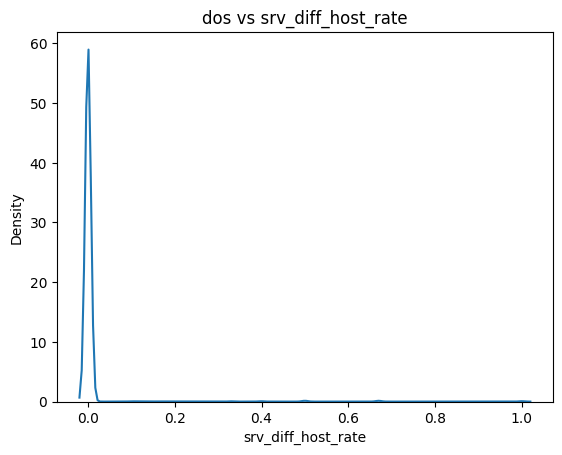

___________________________________________________________________________________



|       |   srv_diff_host_rate |
|:------|---------------------:|
| count |         11656        |
| mean  |             0.299903 |
| std   |             0.458085 |
| min   |             0        |
| 25%   |             0        |
| 50%   |             0        |
| 75%   |             1        |
| max   |             1        |

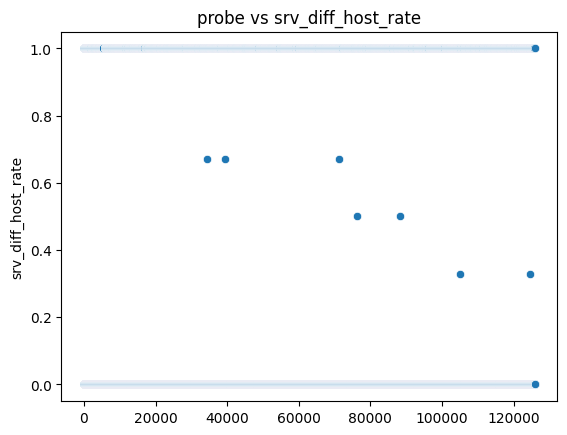

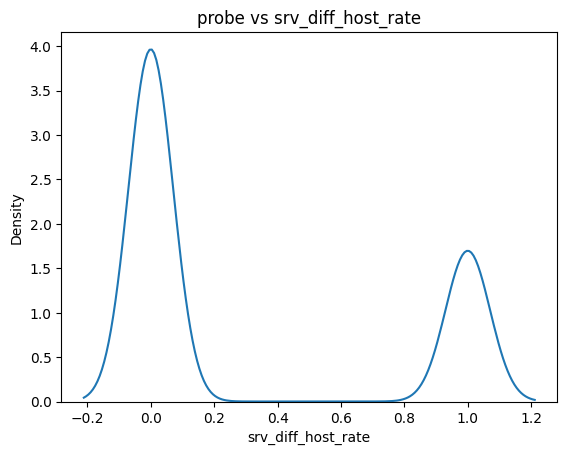

___________________________________________________________________________________



|       |   srv_diff_host_rate |
|:------|---------------------:|
| count |           85         |
| mean  |            0.0656471 |
| std   |            0.203549  |
| min   |            0         |
| 25%   |            0         |
| 50%   |            0         |
| 75%   |            0         |
| max   |            1         |

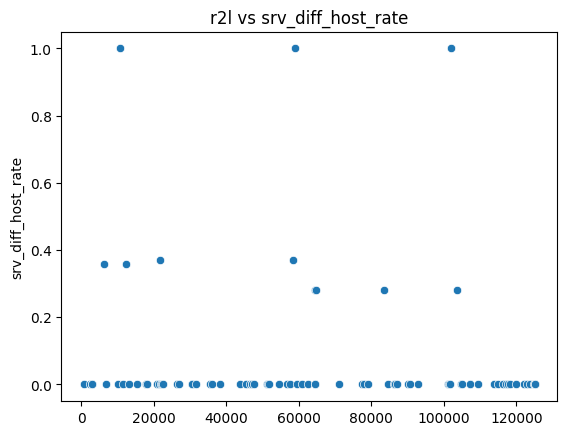

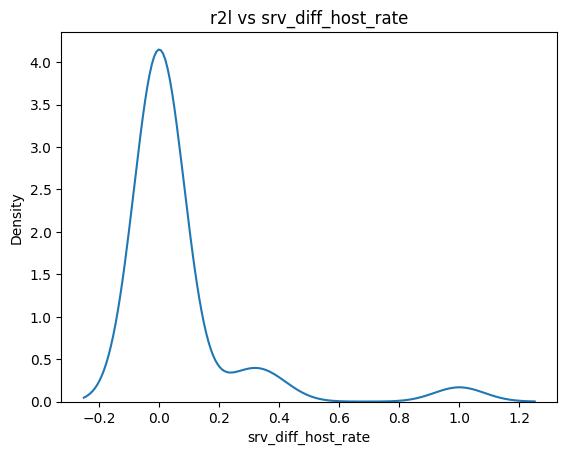

___________________________________________________________________________________



|       |   srv_diff_host_rate |
|:------|---------------------:|
| count |                   43 |
| mean  |                    0 |
| std   |                    0 |
| min   |                    0 |
| 25%   |                    0 |
| 50%   |                    0 |
| 75%   |                    0 |
| max   |                    0 |

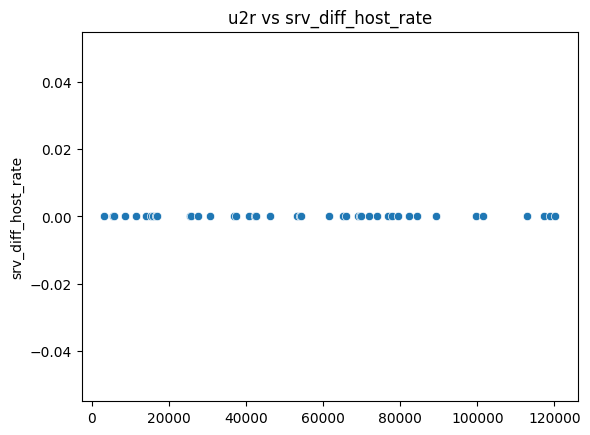

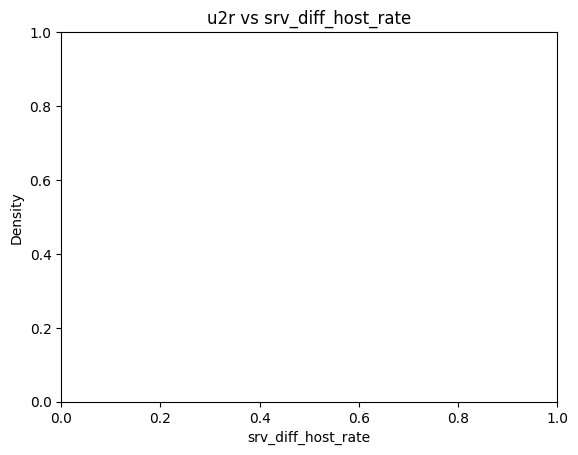

In [29]:
for i in df.columns[20:30]:
    display(Markdown('## {}<br/>'.format(i)))
    eda(i,df,attacks)
    print()
    print()
    input()
    clear_output(wait=True)

## dst_host_srv_rerror_rate<br/>

___________________________________________________________________________________



|       |   dst_host_srv_rerror_rate |
|:------|---------------------------:|
| count |              68262         |
| mean  |                  0.0441058 |
| std   |                  0.190959  |
| min   |                  0         |
| 25%   |                  0         |
| 50%   |                  0         |
| 75%   |                  0         |
| max   |                  1         |

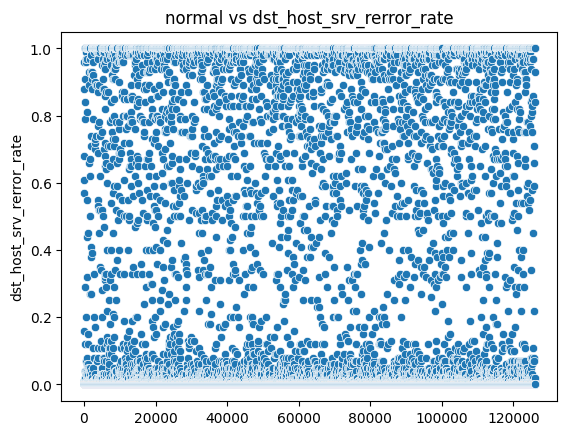

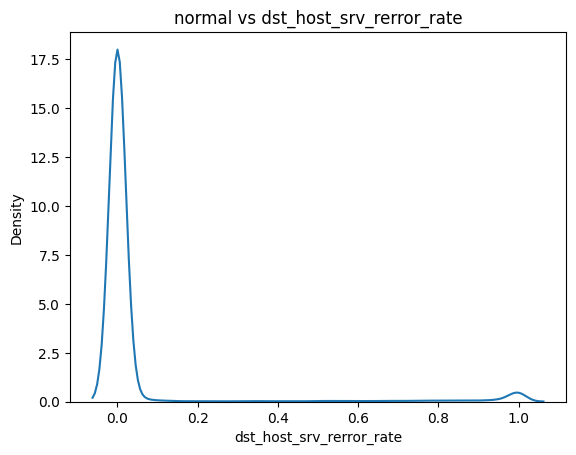

___________________________________________________________________________________



|       |   dst_host_srv_rerror_rate |
|:------|---------------------------:|
| count |               45927        |
| mean  |                   0.151286 |
| std   |                   0.356946 |
| min   |                   0        |
| 25%   |                   0        |
| 50%   |                   0        |
| 75%   |                   0        |
| max   |                   1        |

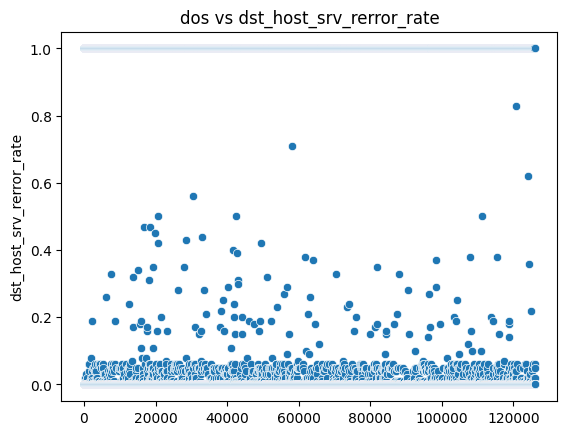

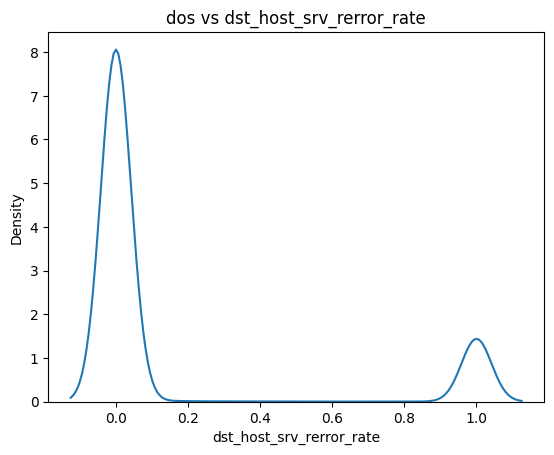

___________________________________________________________________________________



|       |   dst_host_srv_rerror_rate |
|:------|---------------------------:|
| count |               11656        |
| mean  |                   0.44103  |
| std   |                   0.493846 |
| min   |                   0        |
| 25%   |                   0        |
| 50%   |                   0        |
| 75%   |                   1        |
| max   |                   1        |

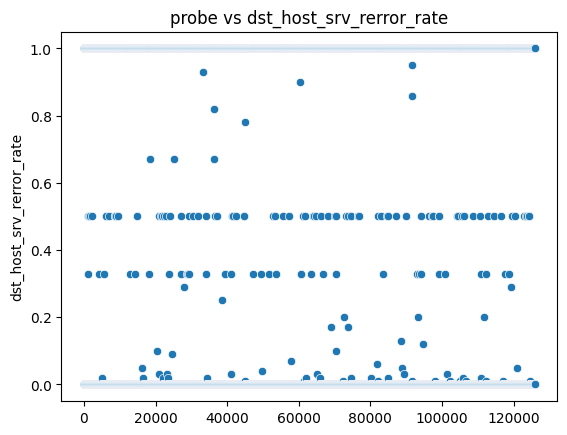

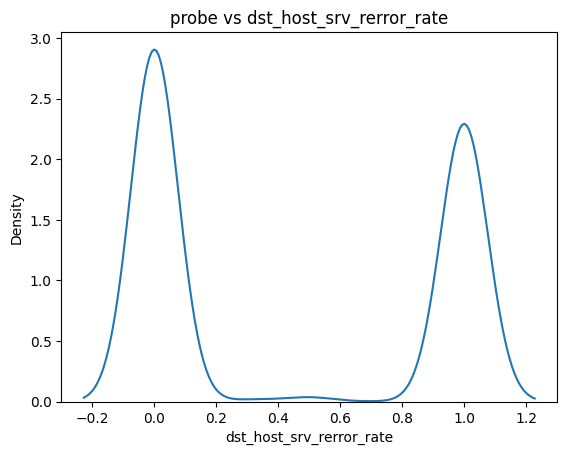

___________________________________________________________________________________



|       |   dst_host_srv_rerror_rate |
|:------|---------------------------:|
| count |                  85        |
| mean  |                   0.548235 |
| std   |                   0.45452  |
| min   |                   0        |
| 25%   |                   0        |
| 50%   |                   0.9      |
| 75%   |                   0.94     |
| max   |                   0.96     |

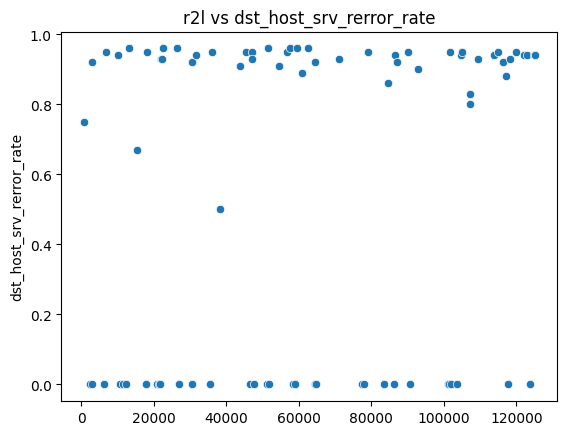

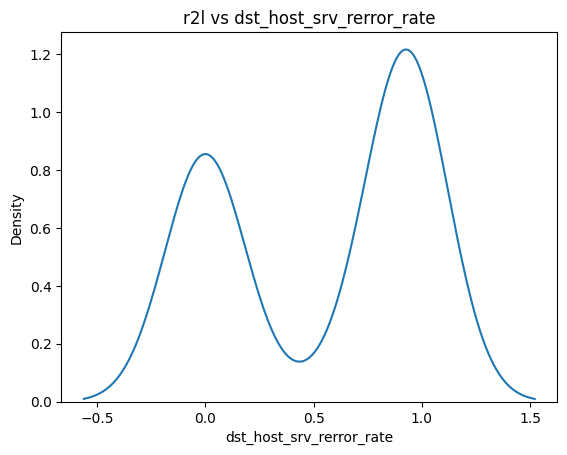

___________________________________________________________________________________



|       |   dst_host_srv_rerror_rate |
|:------|---------------------------:|
| count |                 43         |
| mean  |                  0.0206977 |
| std   |                  0.0554375 |
| min   |                  0         |
| 25%   |                  0         |
| 50%   |                  0         |
| 75%   |                  0         |
| max   |                  0.25      |

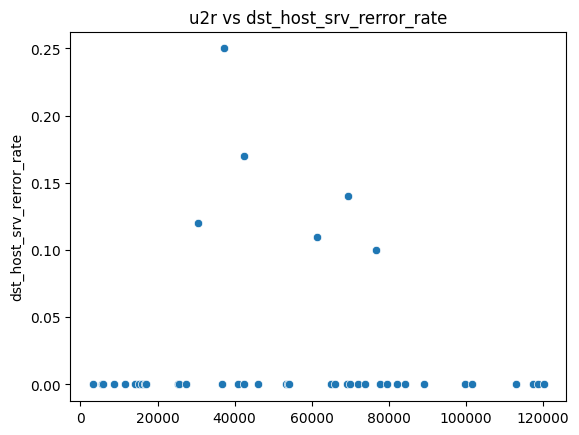

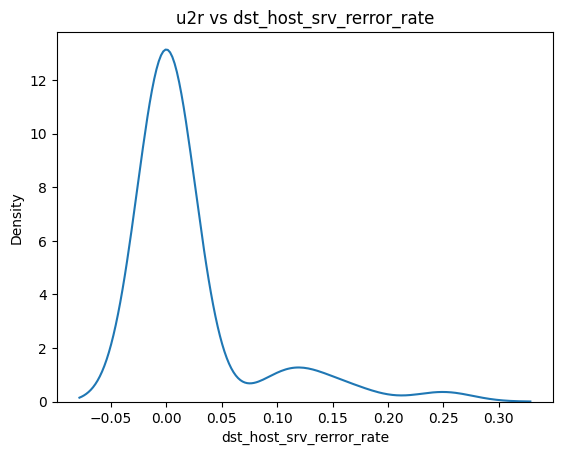

In [31]:
for i in df.columns[30:-1]:
    display(Markdown('## {}<br/>'.format(i)))
    eda(i,df,attacks)
    print()
    print()
    input()
    clear_output(wait=True)

<br/>
<br/>

### service

In [17]:
df['service'].value_counts()[:50]

http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6860
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
courier          734
bgp              710
whois            693
uucp_path        689
iso_tsap         687
time             654
imap4            647
nnsp             630
vmnet            617
urp_i            602
domain           569
ctf              563
csnet_ns         545
supdup           544
discard          538
http_443         530
daytime          521
gopher           518
efs              485
systat           477
link             475
exec             474
hostnames        460
name             451
mtp              439
echo             434
klogin           433
login            429
ldap             410
netbios_dgm      405
sunrpc           381
netbios_ssn      362
netstat          360
netbios_ns   

<br/>

Keeping http , private , domain_u , smtp and ftp_data rest changing all other services to other

In [18]:
def map_service(service:str)->str:
    if (service=='http') : return 'http'
    elif(service=='private') : return 'private'
    elif(service=='doamin_u') : return 'doamin_u'
    elif(service=='smtp') : return 'smtp'
    elif(service=='ftp_data') : return 'ftp_data'
    else : return 'other'

In [19]:
df['service'] = df['service'].apply(map_service)
df['service'] = df['service'].astype('category')

In [20]:
df['service'].value_counts()

other       49609
http        40338
private     21853
smtp         7313
ftp_data     6860
Name: service, dtype: int64

Total Categories :  5


|    | Category   |   Percentage |
|---:|:-----------|-------------:|
|  0 | other      |     39.3807  |
|  1 | http       |     32.0211  |
|  2 | private    |     17.3474  |
|  3 | smtp       |      5.80521 |
|  4 | ftp_data   |      5.44561 |



___________________________________________________________________________________

http        38049
other       16618
smtp         7029
ftp_data     5584
private       982
Name: service, dtype: int64


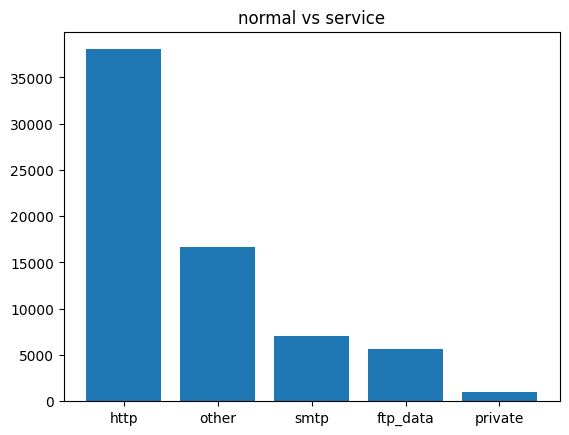


___________________________________________________________________________________

other       26251
private     15971
http         2255
ftp_data     1209
smtp          241
Name: service, dtype: int64


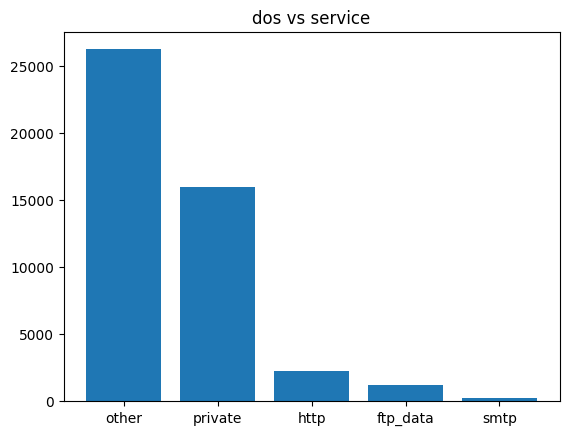


___________________________________________________________________________________

other       6632
private     4900
ftp_data      51
smtp          43
http          30
Name: service, dtype: int64


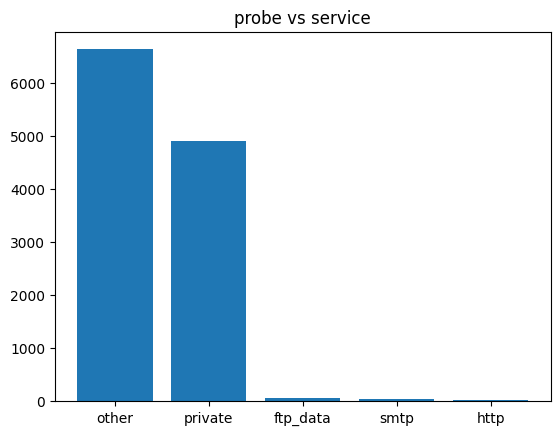


___________________________________________________________________________________

other       74
ftp_data     7
http         4
private      0
smtp         0
Name: service, dtype: int64


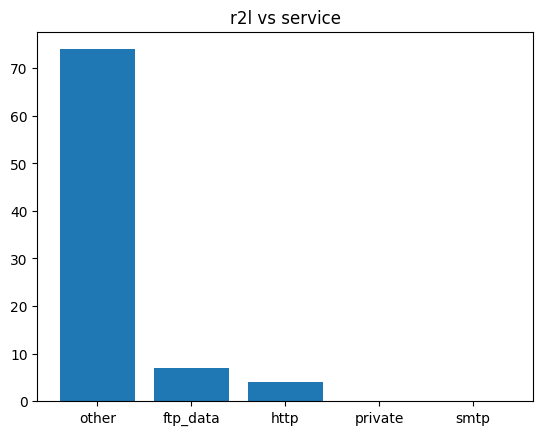


___________________________________________________________________________________

other       34
ftp_data     9
http         0
private      0
smtp         0
Name: service, dtype: int64


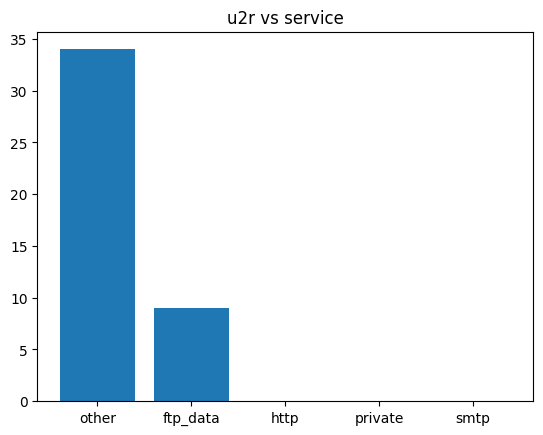

In [21]:
eda('service',df,attacks)   

<br/>
<br/>

### flag

In [22]:
df['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

Keeping only SF , S0 , REJ , RSTR and RSTO flags and turning all other flags to other category

In [23]:
def map_flags(flag):
    if(flag=='SF') : return 'SF'
    elif(flag=='S0') : return 'S0'
    elif(flag=='REJ') : return 'REJ'
    else : return 'other'

In [24]:
df['flag'] = df['flag'].apply(map_flags)
df['flag'] = df['flag'].astype('category')
df['flag'].value_counts()

SF       74945
S0       34851
REJ      11233
other     4944
Name: flag, dtype: int64

Total Categories :  4


|    | Category   |   Percentage |
|---:|:-----------|-------------:|
|  0 | SF         |     59.4929  |
|  1 | S0         |     27.6655  |
|  2 | REJ        |      8.91699 |
|  3 | other      |      3.92465 |



___________________________________________________________________________________

SF       64308
REJ       2693
other      907
S0         354
Name: flag, dtype: int64


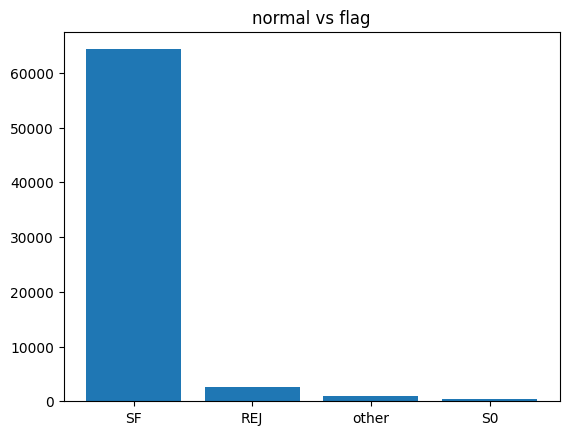


___________________________________________________________________________________

S0       34344
REJ       5671
SF        4599
other     1313
Name: flag, dtype: int64


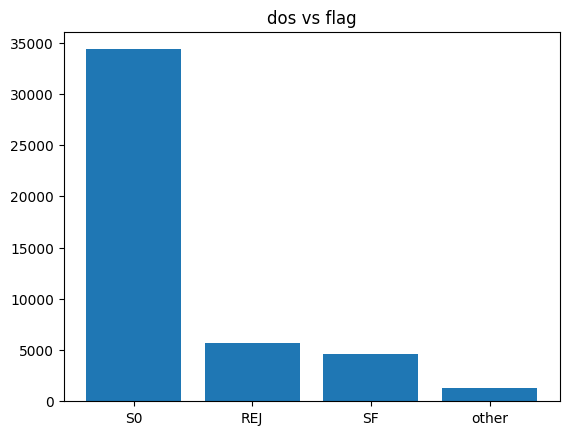


___________________________________________________________________________________

SF       5967
REJ      2869
other    2667
S0        153
Name: flag, dtype: int64


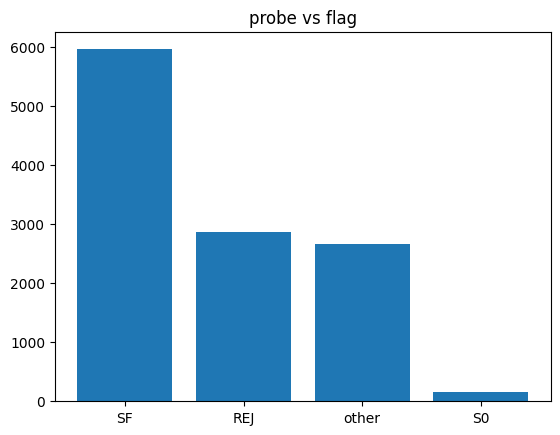


___________________________________________________________________________________

other    56
SF       29
REJ       0
S0        0
Name: flag, dtype: int64


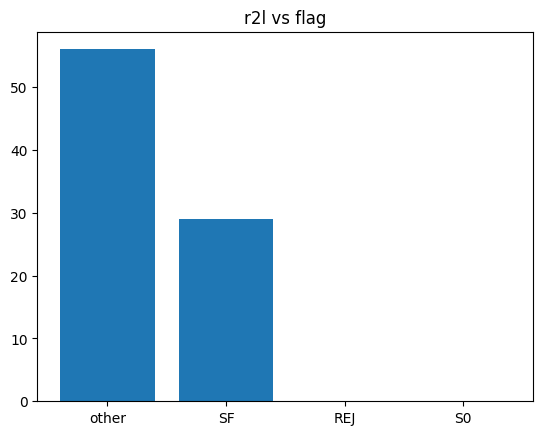


___________________________________________________________________________________

SF       42
other     1
REJ       0
S0        0
Name: flag, dtype: int64


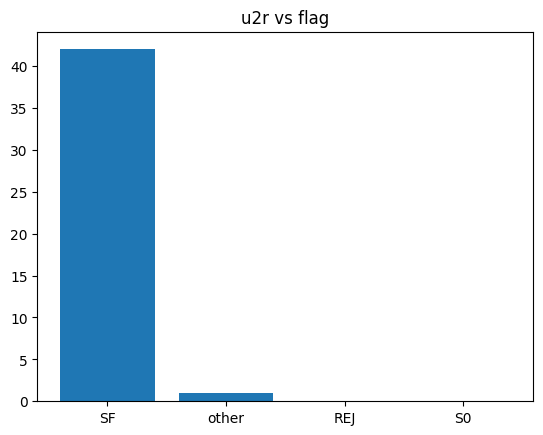

In [25]:
eda('flag',df,attacks)

In [26]:
df[df['urgent']!=0]['attack_category']

3173         u2r
32978     normal
88122     normal
89785     normal
90778        r2l
101086       r2l
103959    normal
111610    normal
115868    normal
Name: attack_category, dtype: object

<br/>
<br/>

### hot

In [27]:
df['hot'].value_counts()

0     123302
2       1037
1        369
28       277
30       256
4        173
6        140
5         76
24        68
19        57
22        55
3         54
18        45
14        30
20         9
7          5
15         4
11         3
25         2
9          2
44         2
77         1
17         1
12         1
10         1
8          1
21         1
33         1
Name: hot, dtype: int64

<br/>
<br/>

# PCA


#### FOR SMALL DF

In [28]:
small_df = df.drop(['land','urgent','num_compromised','num_root','is_host_login','is_guest_login'],axis=1)
small_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category'],
      dtype='object')

In [29]:
numeric_small_df = small_df.select_dtypes(exclude=['category','object'])
for i in numeric_small_df.columns:
    print(df[i].dtype)    

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_small_df = np.asarray(numeric_small_df)
scaled_small = scaler.fit_transform(numeric_small_df)
scaled_small

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.6248708 ,
        -0.22453241, -0.37638703],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.6248708 ,
        -0.35501418, -0.37638703],
       [-0.11024922, -0.00776224, -0.00491864, ...,  1.6189552 ,
        -0.38763462, -0.37638703],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.6248708 ,
        -0.38763462, -0.37638703]])

In [31]:
from sklearn.decomposition import PCA
pca_small = PCA(n_components=3)
principalComponents_small = pca_small.fit_transform(scaled_small)

In [32]:
PCA_small_df = pd.DataFrame(data = principalComponents_small
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [33]:
PCA_small_df['attack_category'] = df['attack_category']
PCA_small_df

,principal component 1,principal component 2,principal component 3,attack_category
0,-0.898741,-0.260387,0.068470,normal
1,0.312223,1.053921,0.255725,normal
2,3.714894,-1.166171,0.050211,dos
3,-2.020988,-1.123232,-0.097189,normal
4,-1.807112,-0.936559,-0.288026,normal
...,...,...,...,...
125968,3.759162,-1.151679,-0.004366,dos
125969,-1.739630,-0.878146,-0.228654,normal
125970,0.023819,-0.474756,0.033486,normal
125971,3.835991,-1.130682,0.053894,dos


In [34]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(PCA_small_df, test_size=0.1, stratify=df['attack_category'])

In [35]:
df_test.shape[0] , df_test['attack_category'].value_counts()

(12598,
 normal    6827
 dos       4593
 probe     1166
 r2l          8
 u2r          4
 Name: attack_category, dtype: int64)

In [36]:
df_test

,principal component 1,principal component 2,principal component 3,attack_category
125685,-1.721713,-0.870791,-0.229031,normal
53104,-0.479699,6.809765,0.607964,probe
37735,-1.788505,-0.931072,-0.291551,normal
76397,-1.490831,-0.891837,-0.607871,normal
123785,3.814471,-1.105076,0.050580,dos
...,...,...,...,...
68187,-1.547012,6.425709,0.639311,probe
28433,-0.588840,0.709139,0.098527,normal
27918,4.022128,-1.052868,0.008122,dos
16330,-1.834346,-0.911795,-0.264451,normal


In [37]:
import plotly.express as px
fig = px.scatter_3d(df_test, x='principal component 1', y='principal component 2', z='principal component 3',color='attack_category')
fig.show()

<br/>
<br/>

#### FOR DF

In [25]:
df.to_csv('transformed_train_data.csv')

In [ ]:
df['attack_category'].value_counts()